Numerical and Categorical Analysis

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
telco_base_data = pd.read_csv('Churn_Modelling.csv')

In [4]:

telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [5]:
telco_new = telco_base_data[['Geography', 'Gender', 'Exited']]

In [6]:

telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,NaN,1
3,France,Female,0
4,Spain,Female,0


In [7]:

telco_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:

telco_new.Exited.value_counts()/len(telco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

Univariate Analysis

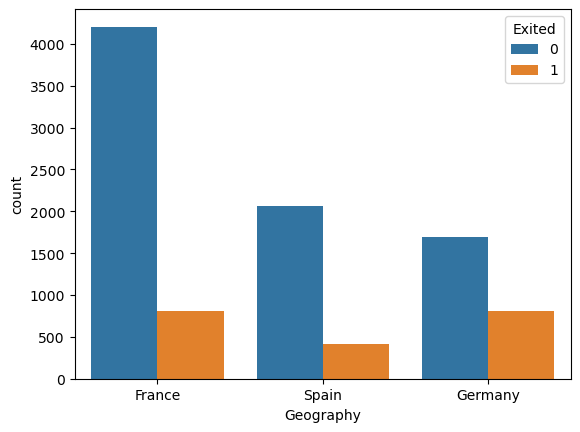

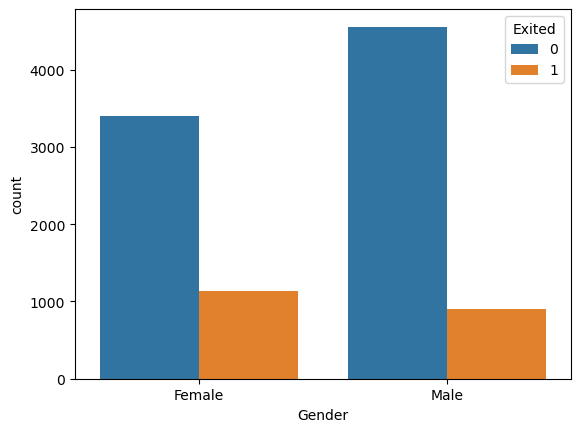

In [9]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=telco_new,x=predictor,hue='Exited')

Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

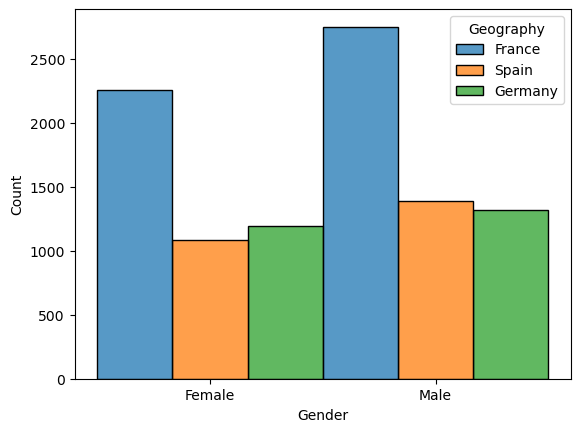

In [10]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat='count', multiple='dodge')

In [11]:
new_df = telco_new.loc[telco_new['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

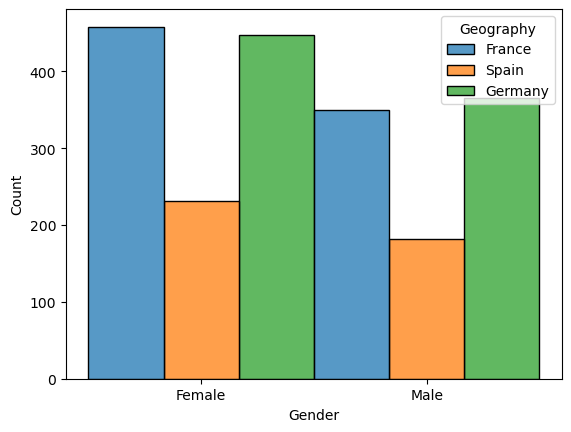

In [12]:
sns.histplot(x='Gender', hue='Geography', data=new_df, stat='count', multiple='dodge')

Numerical Analysis

Correlation: From -1 to 1
* +1 : Positive correlation
* -1 : Negative correlation
* 0 : No correlation

In [14]:
numeric_data = telco_base_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000305 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009950 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003698  0.000842   
Age               0.000305    0.009950    -0.003698  1.000000 -0.009762   
Tenure           -0.006495   -0.014883     0.000842 -0.009762  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028447 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030724  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011966  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085117 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007039  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285298 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

<Axes: >

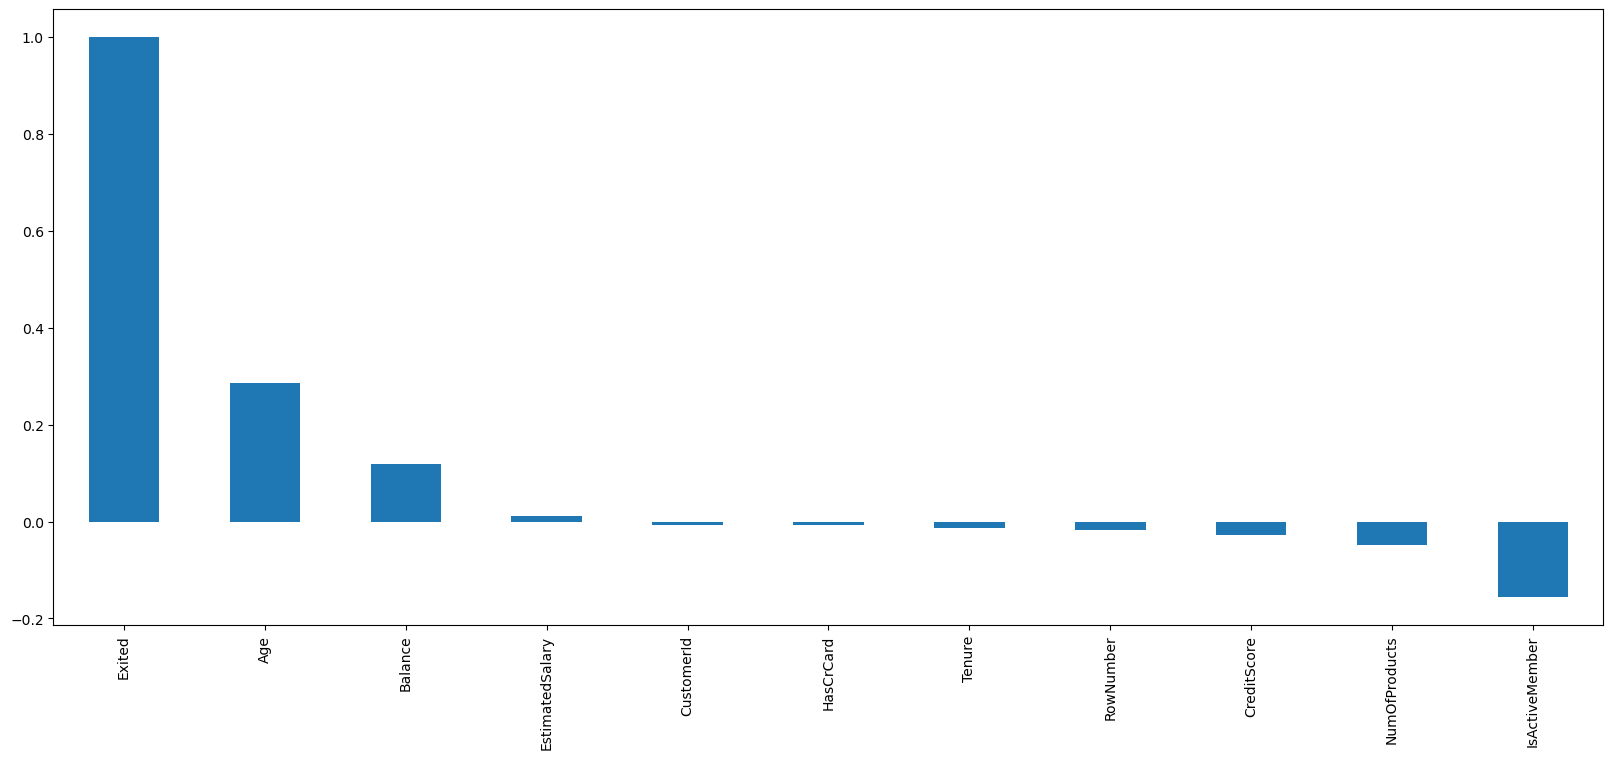

In [19]:
plt.figure(figsize=(20,8))
correlation_matrix['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

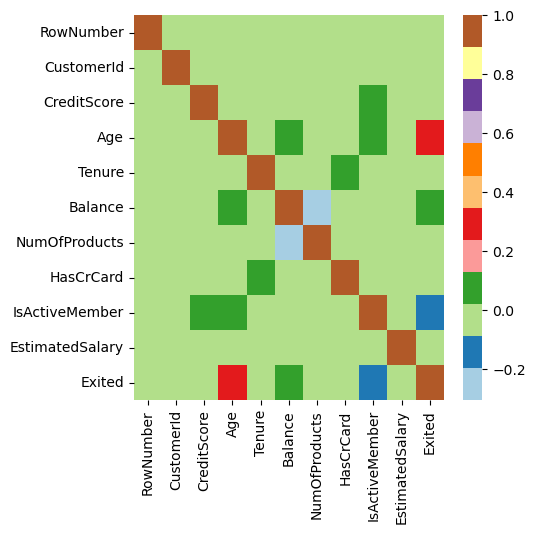

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, cmap='Paired')

<Axes: xlabel='Age'>

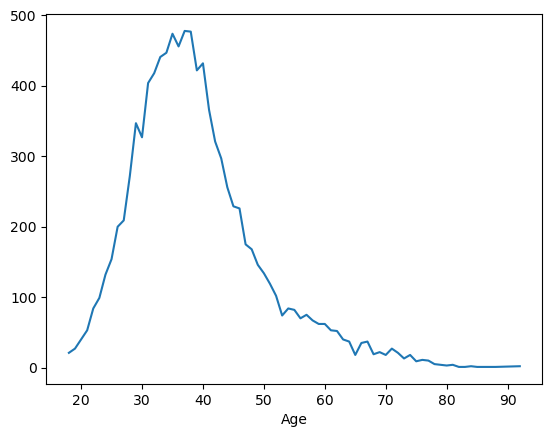

In [24]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

In [25]:
telco_base_data1 = telco_base_data.loc[telco_base_data['Exited']==1]

<Axes: xlabel='Age'>

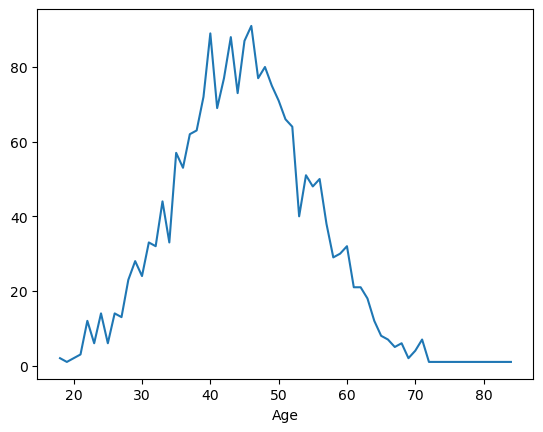

In [26]:
telco_base_data1['Age'].value_counts().sort_index(ascending=True).plot()

/tmp/ipykernel_300198/2683109832.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)],color='Red',shade=True)
/tmp/ipykernel_300198/2683109832.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Age by churn')

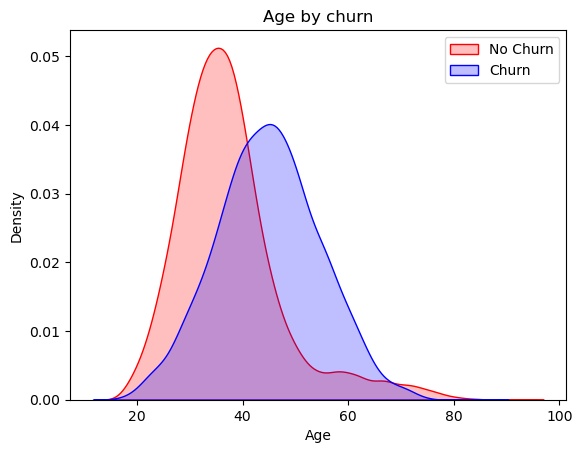

In [27]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)],color='Red',shade=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)],color='Blue',shade=True)
Tot.legend(['No Churn','Churn'],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')